# Tutorial 0: Intro material for LAT Workshop

In this introductory tutorial, we will give a basic overview of a few Python topics that are essential to understanding and using codes developed within the LISA Analysis Tools environment. You will also get an initial understanding how the tutorials are structured. ,

This module is meant to be completed before the workshop. It will also ensure installation is successful.

* Tasks: throughout the tutorials, you will be given "tasks." These will direct the tutorial approach and separate the tutorials into natural sections. 
* Questions: additional questions are given within larger tasks. These will sometimes involve coding, sometimes not. A lot of them are meant to be discussion questions for yourself or small groups.
* Structure: Depending on the task at hand, we will provide a specific intruction, small amounts of code, and documentation that is helpful to complete the task. The user must do most or all of the actual coding in order to make these notebooks run successfully. **Note**: in many cases, tutorials within the specific code bases are also available that can you close to the right answer. Most instances, the user will have to navigate these tutorials to find helpful answers. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful
from lisatools.utils.constants import *

## Task 1: build and initialize a class object. 

Classes are essential objects in the construction of LISA Analysis Tools and its associated codes. Understanding and using classes will maximize your understanding and capabilities with LISA Analysis Tools. 


Build a class object that has two methods: `__init__` and `get_wave`. 

In `__init__`, store a frequency, amplitude, and initial phase.

In `get_wave`, enter a time array as an argument. Then use the frequency, amplitude, and initial phase stored in `self` and the time array to return a sinusoidal function result to the user.

Helpful documentation:
* [Python class objects](https://docs.python.org/3/tutorial/classes.html#class-objects)

In [2]:
class Waveform:
    def __init__(self, A, f, phi0):
        self.A = A
        self.f = f
        self.phi0 = phi0

    def get_wave(self, t_arr):
        return self.A * np.sin(2 * np.pi * self.f * t_arr + self.phi0)

Now, instantiate the class by providing the necessary arguments. Build a numpy array for the time array and test your class output. 

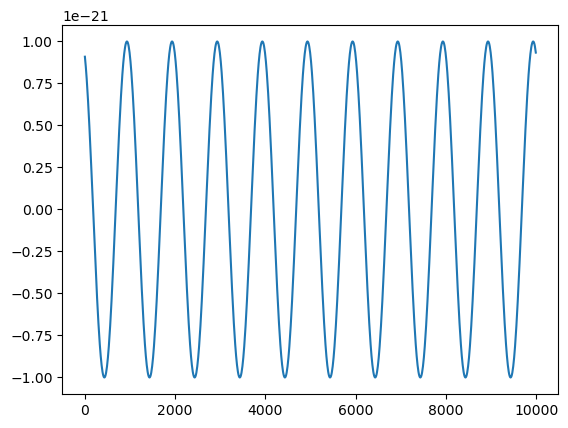

In [3]:
t_arr = np.arange(0.0, 10000.0, 10.0)

wave = Waveform(1e-21, 1e-3, 2.0)

y = wave.get_wave(t_arr)

plt.plot(t_arr, y)

## Task 2: `*args` and `**kwargs`

Another topic that is essential to using `lisatools`, is the usage of `*args` and `**kwargs`. These are ways to have flexible passage of Arguments (`*args`) and Keyword Arguments (`**kwargs`). Here, we will experiment with a few ways this works.

Useful documentation:
* [examples](https://www.geeksforgeeks.org/args-kwargs-python/)

We are effectively going to copy those examples. Start by designing a function that takes a flexible number of arguments and prints them out. The function signature will be `func(*args)`. In this case, args will be an iterable, so you can iterate through the arguments with a for loop. 

In [4]:
def func(*args):
    for arg in args:
        print(arg)

func(1, 2, 3, "apple")

1
2
3
apple


Add a few arguments into the function signature before `*args` and observe how that changes.

In [5]:
def func(x, y, *args):
    for arg in args:
        print(arg)

func(1, 2, 3, "apple")

3
apple


Now do the same things for `func(**kwargs)`. This will produce a dictionary, so print that in a for loop. 

In [6]:
def func(**kwargs):
    for key, val in kwargs.items():
        print(key, val)

func(x=1.0, y=" :) ")

x 1.0
y  :) 


`**kwargs` can be very useful when making functions flexible because you can have it field the specific `kwargs` needed and store any others in the `**kwargs` dictionary. Add keyword arguments into the function signature and see how it changes the printing results. 

In [7]:
def func(x=2, y=1, **kwargs):
    for key, val in kwargs.items():
        print(key, val)

func(x=1.0, y=10, z=" :) ")

z  :) 


You can also perform effectively the inverted operations. You can enter an iterable into a function call with `*args` and it will spread out your iterable to the args in the function signature. Make a function call with 2 arguments only. Then, create a list that has 2 entries. Enter it into the function call with `*list` and print the output in the function.

In [8]:
def func(x, y, z):
    print(x, y, z)

inputs = [1, 2, 3]

func(*inputs)

1 2 3


Same type of thing works for kwargs with any input dictionary called like `**dict`. Do the same thing as above for `kwargs`.

In [9]:
def func(x=2, y=1, z=3):
    print(x, y, z)

in_dict = {"x": 1.0, "y": 10, "z": " :) "}
func(**in_dict)

in_dict = {"x": 1.0, "y": 10}
func(**in_dict)

1.0 10  :) 
1.0 10 3


## Task 3: Class inheritance

Class inheritance gets a bit more complex. It is not essential to know this for the workshop specifically, but it can really help you understand LISA Analysis Tools and other abstracted code libraries designed for future development and maintenance. 

Copy your class from above. Add a keyword argument to the `__init__` function that takes a vertical bias from zero for the sinusoidal function (a float value). Store it to `self`. Inside of `get_wave` add this value onto the end of the sinusoidal return value. 

**Note**: make sure any value entered for $A$ is not too many orders of magnitude away from this added bias factor. Otherwise, you may have issues with machine precision.


In [10]:
class Waveform:
    def __init__(self, A, f, phi0, factor=1.0):
        self.A = A
        self.f = f
        self.phi0 = phi0
        self.factor = 1.0

    def get_wave(self, t_arr):
        return self.A * np.sin(2 * np.pi * self.f * t_arr + self.phi0) + self.factor


Now, we will create a class that will inherit our class above and adjust its output on the way through the computation. Add two methods to this class:

In `__init__`, have it take in a single argument representing a multiplicative factor (a float value). Store it in `self`. Then, in the function signature, make sure it is flexible by adding an adjustable number of arguments and keyword arguments. Pass these arguments and keyword arguments to the parent class with this type of line: 
```
super(ChildClass, self).__init__(*args, **kwargs)
```

`__call__` methods on functions allow the user to initialize a class and pass it as a function or `callable`. In other words: `c = Class()` -> `y = c(x)`, rather than having to name a specific method like `get_wave`. 

Useful Documentation:
* [`__call__`](https://www.geeksforgeeks.org/__call__-in-python/) (this is a clickable link)

In `__call__`, take one argument, the time array (numpy array), and put it into the `get_wave` method. Take the output from `get_wave` and multiply by the stored multiplicative factor. Return that to the user. 

In [11]:
class ChildClass(Waveform):
    def __init__(self, multiplicative_factor, *args, **kwargs):
        self.multiplicative_factor = multiplicative_factor

        # initialize the parent class
        super(ChildClass, self).__init__(*args, **kwargs)

    def __call__(self, t_arr):
        y = self.get_wave(t_arr)
        return y * self.multiplicative_factor

Now initialize and test your class.

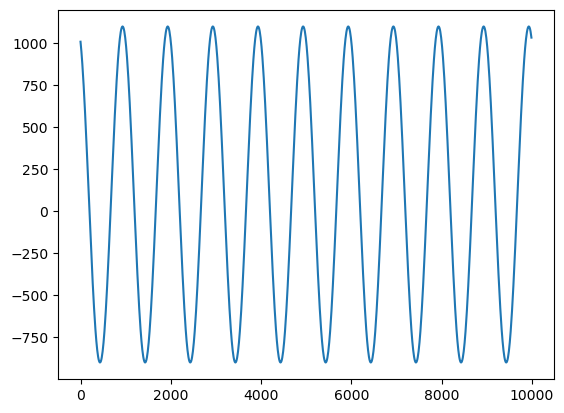

In [12]:
check = ChildClass(100.0, 10.0, 1e-3, 2.0, factor=20.0)
plt.plot(t_arr, check(t_arr))

## A `pdb` manifesto. 

(Michael's opinion)

The python debugger ([pdb](https://docs.python.org/3/library/pdb.html)) is an unbelievably helpful tool. For me, it is up there with `Numpy` and `Matplotlib` in terms of how useful it has been for me. It has shaved so much time from the development process, it is honestly incalculable. `pdb` allows you to use most one-line `ipython` commands stopped anywhere in your code. In other words, you can stop your Python code and run functions, print any stored variables, store new variables, plot things, etc.

I notice that a lot of people do not know about this intrinsic python library or do not use it. 


The start of my development code file is usually:
```
import numpy as np


if __name__ == "__main__":

    # debugger at the end to catch and analyze any output. 
    breakpoint()  
```

I often do, what I am now calling as of writting this, "proactive debugging." Proactive debugging means that the code is run until it reaches a point where I am about to develop. I will then develop line by line in the debugger, testing each line as I go. Once it works, it gets pasted in the code. This is a little tedious to get used to and does not work sometimes (only sometimes), but I highly recommend trying it. It is a very efficient way to develop code in my opinion.  

We are not going to practice it here because it really does not work as well in a notebook. It is more useful in the terminal. In the terminal, it is an almost ipython-like experience stopping anywhere in the code you place a `breakpoint`. You can use it to stop inside functions you design, or inside python codes of others. In other words, you can open a python code that is in your `$PATH` and place a breakpoint inside of it. You can then run your code that calls this package. It will stop at your breakpoint. You can step through and print anything you need. This has really helped me in the past to learn better coding techniques and to understanding complex codes others have designed. 

Here is the documentation:
* [pdb](https://docs.python.org/3/library/pdb.html)